# Импорт библиотек

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names) # Матрица значений + заголовки
df['MedHouseVal'] = data.target * 100000 # Целевая переменная (цена в долларах)

# Первый взгляд на данные
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистики:")
print(df.describe())

Размер датасета: (20640, 9)

Первые 5 строк:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23     452600.0  
1    -122.22     358500.0  
2    -122.24     352100.0  
3    -122.25     341300.0  
4    -122.25     342200.0  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null

In [3]:
# pandas - для работы с табличными данными (DataFrame)
# numpy - для математических операций
# matplotlib.pyplot и seaborn - для построения графиков
# sklearn (Scikit-learn) - главная библиотека машинного обучения:
# fetch_california_housing - загрузка датасета
# train_test_split - разделение данных на обучение и тест
# StandardScaler - масштабирование данных
# LinearRegression, RandomForestRegressor - модели машинного обучения
# mean_absolute_error и др. - метрики для оценки качества

# data.data = признаки (features) = X = "входные данные"
# data.target = целевая переменная = y = "то, что предсказываем"
# Модель учится находить функцию: y = f(X)
# В нашем случае: Цена = f(Доход, Возраст_дома, Комнаты, ...)

# Разведочный анализ (EDA)
###

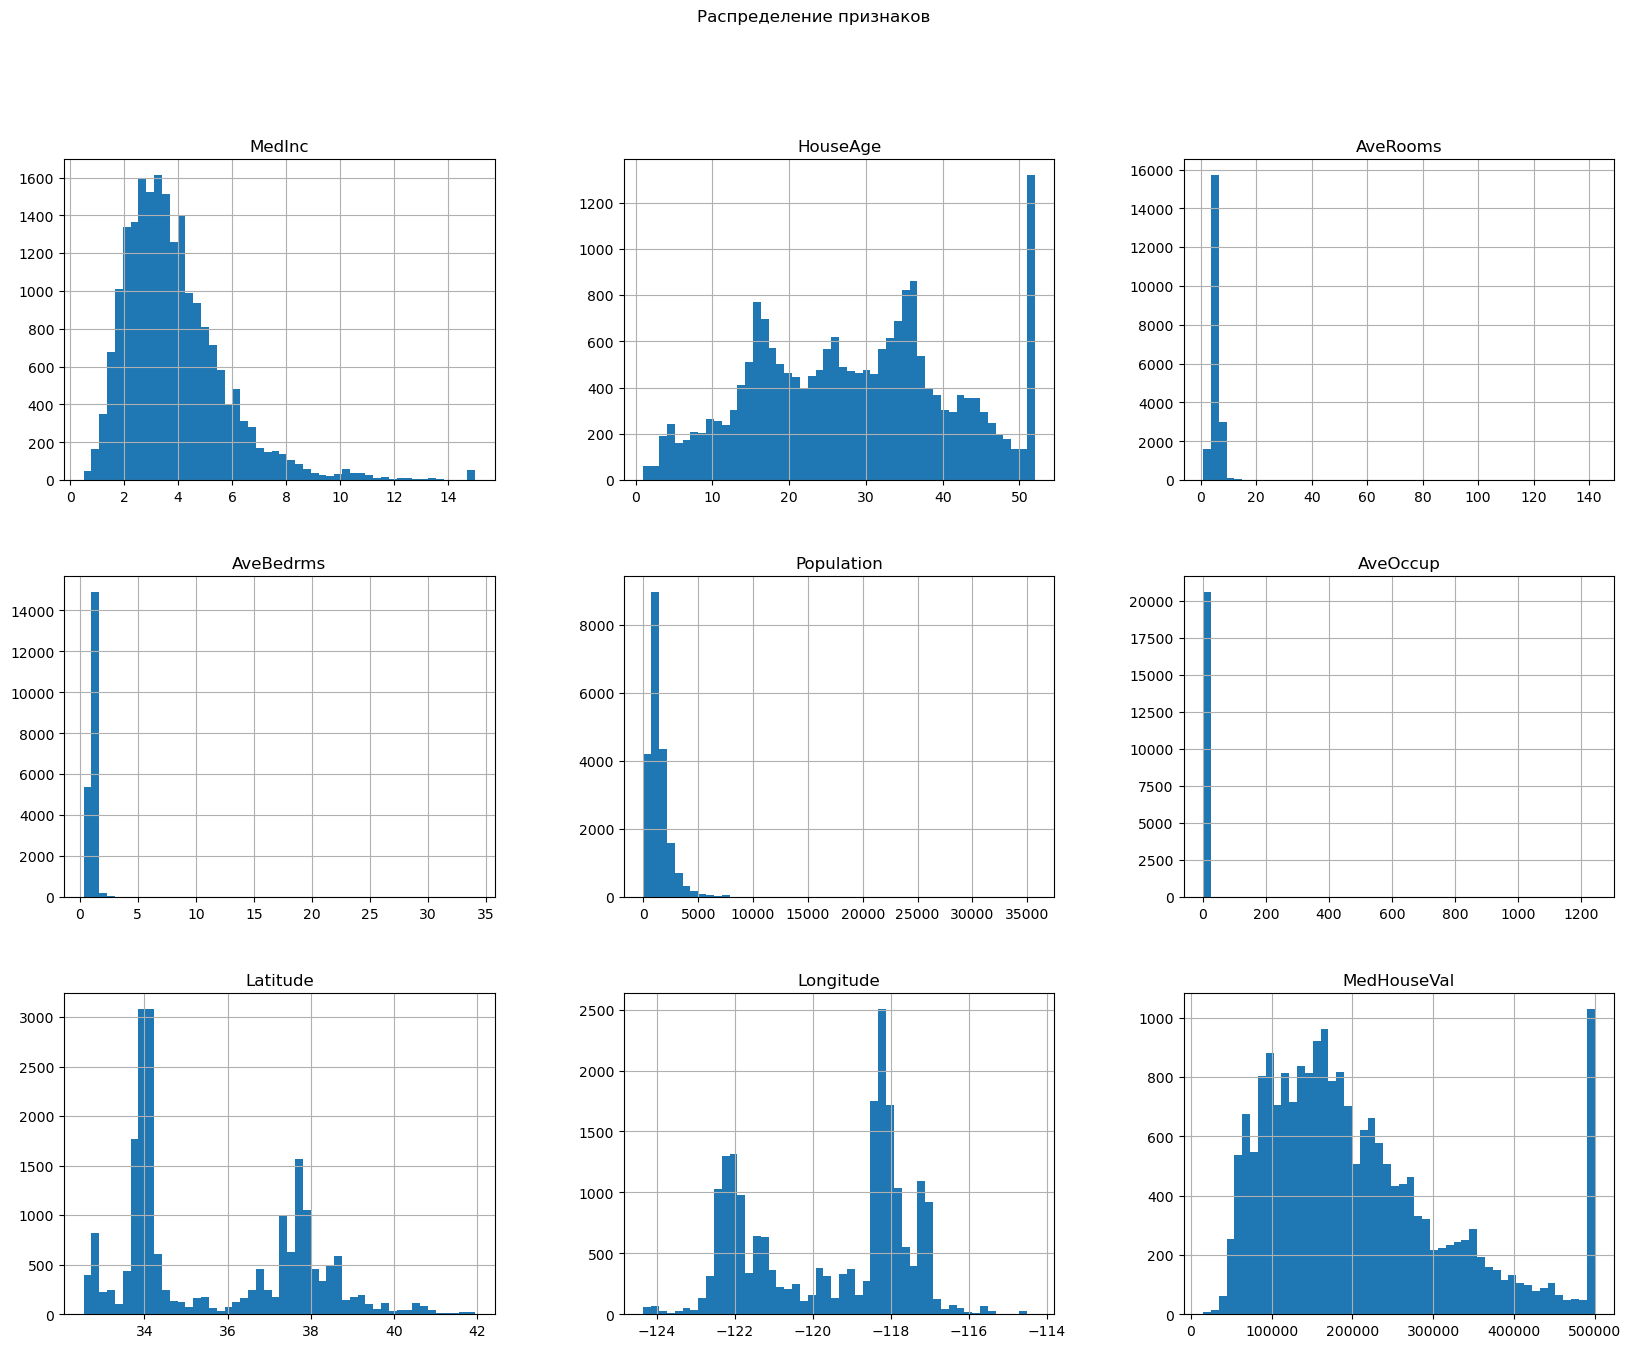

In [4]:
# Гистограммы распределения признаков
df.hist(bins=50, figsize=(20, 15)) #кол-во интервалов и размер диаграммы
plt.suptitle('Распределение признаков')
plt.show()

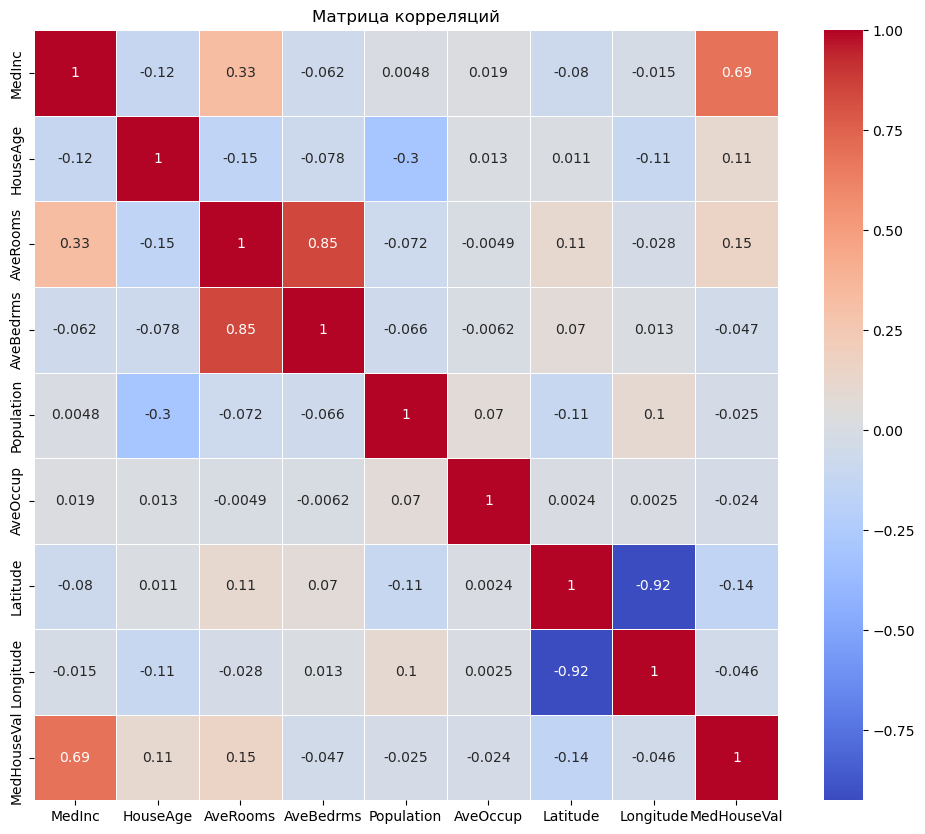

In [5]:
# Матрица корреляций и тепловая карта
# Корреляция - это мера того, насколько два признака связаны друг с другом.
# +1.0: Идеальная положительная связь (когда один растет, другой тоже растет)
# 0.0: Нет связи
#-1.0: Идеальная отрицательная связь (когда один растет, другой падает)

plt.figure(figsize=(12, 10))
corr_matrix = df.corr() #Матрица корреляций
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

<!-- +1.0: Идеальная положительная связь (когда один растет, другой тоже растет)
0.0: Нет связи
-1.0: Идеальная отрицательная связь (когда один растет, другой падает) -->

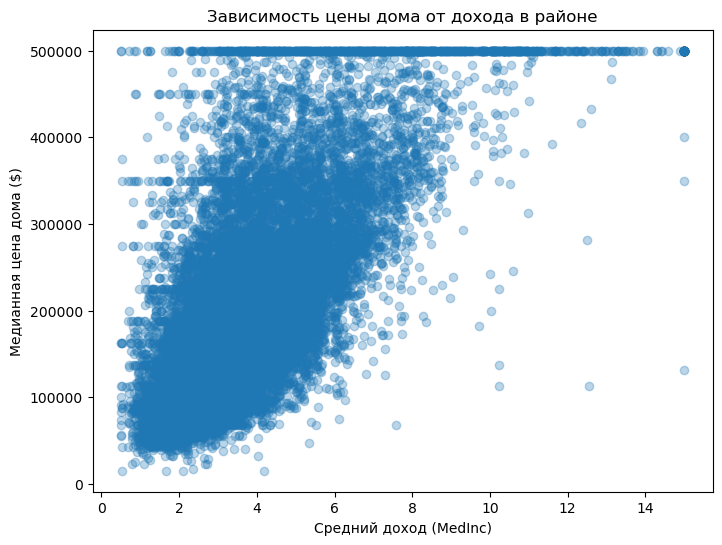

In [6]:
# Диаграмма рассеяния целевой переменной и самого значимого признака
plt.figure(figsize=(8, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Средний доход (MedInc)')
plt.ylabel('Медианная цена дома ($)')
plt.title('Зависимость цены дома от дохода в районе')
plt.show()

# Предобработка данных

Пропущенные значения:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Границы выбросов для MedInc:
Q1 (25-й перцентиль): 2.53
Q3 (75-й перцентиль): 4.55
IQR: 2.03
Нижняя граница: -0.51
Верхняя граница: 7.59


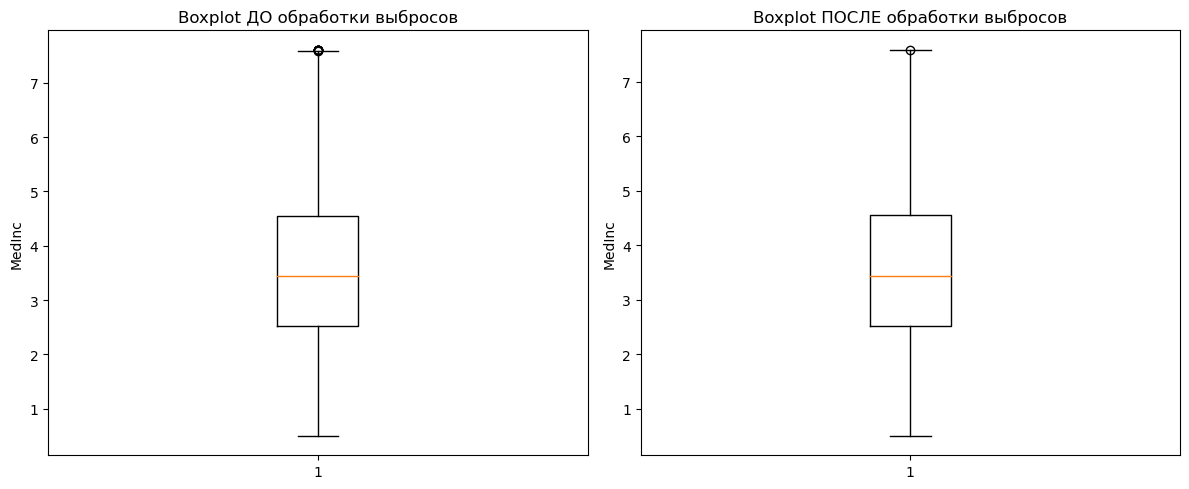

In [11]:
# Проверка на пропущенные значения
print("Пропущенные значения:")
print(df.isnull().sum())
# df.isnull() - создает DataFrame такого же размера, где True = пропуск, False = не пропуск
# .sum() - суммирует True по каждому столбцу (в pandas True = 1, False = 0)
# В этом датасете пропусков нет, но если бы они были, мы бы заполнили их медианой или средним.

# Посмотрим на выбросы до обработки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['MedInc'])
plt.title('Boxplot ДО обработки выбросов')
plt.ylabel('MedInc')


# Обработка выбросов (на примере MedInc)
Q1 = df['MedInc'].quantile(0.25) # Первый квартиль (25-й процентиль)
Q3 = df['MedInc'].quantile(0.75) # Третий квартиль (75-й процентиль)
IQR = Q3 - Q1  # Межквартильный размах
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# Оставляем только строки в пределах границ
df = df[(df['MedInc'] >= lower_bound) & (df['MedInc'] <= upper_bound)]


print(f"Границы выбросов для MedInc:")
print(f"Q1 (25-й перцентиль): {Q1:.2f}")
print(f"Q3 (75-й перцентиль): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# После обработки
plt.subplot(1, 2, 2)
plt.boxplot(df['MedInc'])
plt.title('Boxplot ПОСЛЕ обработки выбросов')
plt.ylabel('MedInc')

plt.tight_layout()
plt.show()

# Выбросы = значения за пределами [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

# Масштабирование признаков (очень важно для линейных моделей и методов, основанных на расстояниях)
# Разделим данные на обучающую и тестовую выборки ПЕРЕД масштабированием, чтобы избежать дата-утечки.
X = df.drop('MedHouseVal', axis=1) # Признаки (все кроме целевой)
y = df['MedHouseVal'] # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% на тест, 80% на обучение

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Что делает StandardScaler:
# Преобразует данные так, чтобы:
# Среднее значение (mean) = 0
# Стандартное отклонение (std) = 1
# X_scaled = (X - mean) / std

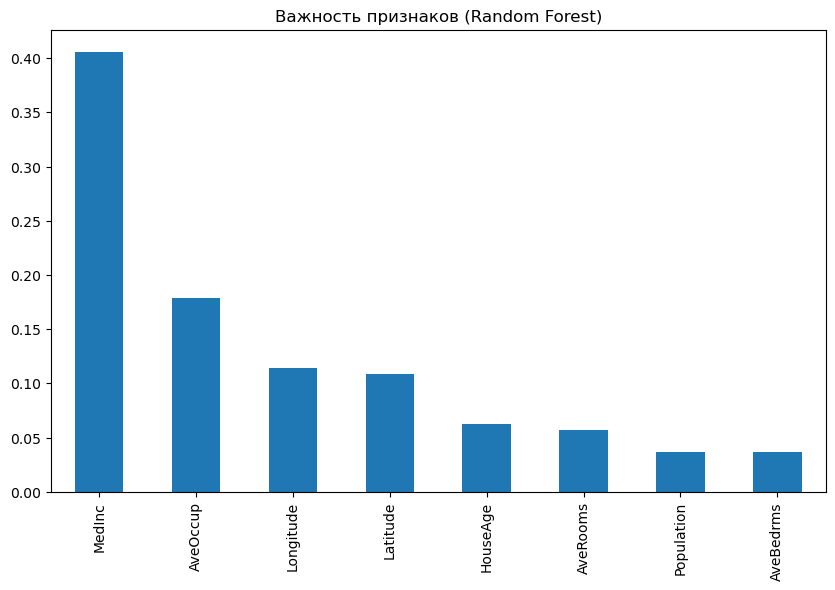

In [12]:
# В этом датасете можно создать новый признак - "комнат на душу населения"
# df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']

# Отбор признаков на основе важности из модели Random Forest
rf_for_feature_importance = RandomForestRegressor(n_estimators=100, random_state=42)
rf_for_feature_importance.fit(X_train_scaled, y_train)
# RandomForestRegressor() — конструктор класса Random Forest для регрессии
# n_estimators=100 — параметр: создаст 100 деревьев решений
# random_state=42 — параметр: фиксирует случайность для воспроизводимости
#     .fit() — метод класса RandomForestRegressor, который запускает обучение
# X_train_scaled — аргумент: обучающие данные (признаки после масштабирования)
# y_train — аргумент: целевые значения для обучения



# Визуализация важности признаков
feature_importances = pd.Series(rf_for_feature_importance.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
# .feature_importances_ — атрибут модели (после обучения содержит важность каждого признака)
# _ в конце — соглашение в sklearn: это атрибуты, вычисленные при обучении
#     .sort_values() — метод сортировки Series
# ascending=False — параметр: сортировать по убыванию (от большего к меньшему)


plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Важность признаков (Random Forest)')
plt.show()

# Обучение моделей

In [15]:
# Модель 1: Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
# Ищет линейную зависимость между признаками и целевой переменной
# Формула: y = w1*x1 + w2*x2 + ... + wn*xn + b
# y — что предсказываем (цена дома)
# x1, x2, ... xn — признаки (доход, возраст дома и т.д.)
# w1, w2, ... wn — веса (коэффициенты), которые модель научится находить
# b — свободный член (bias)

# Модель 2: Случайный лес (ансамблевый метод, обычно показывает хорошие результаты)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
# RandomForestRegressor() — конструктор для регрессии (есть также RandomForestClassifier для классификации)
# n_estimators=100 — создаст 100 деревьев решений
# # random_state=42 — для воспроизводимости результатов
# Ансамбль (комитет) из многих деревьев решений
# Каждое дерево обучается на случайном подмножестве данных
# Итоговый прогноз = среднее прогнозов всех деревьев

# Оценка качества

In [18]:
def evaluate_model(y_true, y_pred, model_name):
    """Функция для вычисления и вывода метрик"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"--- Метрики для {model_name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}\n")
    return mae, rmse, r2

print("Оценка качества на тестовой выборке:")
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Линейной Регрессии")
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Случайного Леса")

Оценка качества на тестовой выборке:
--- Метрики для Линейной Регрессии ---
MAE: 52938.00
RMSE: 72628.73
R²: 0.5469

--- Метрики для Случайного Леса ---
MAE: 32745.01
RMSE: 50553.75
R²: 0.7805



# Анализ результатов

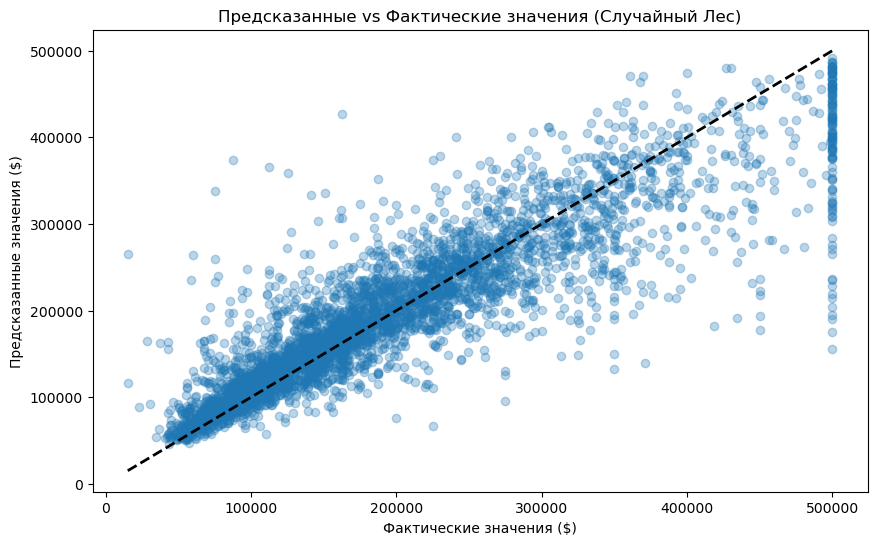

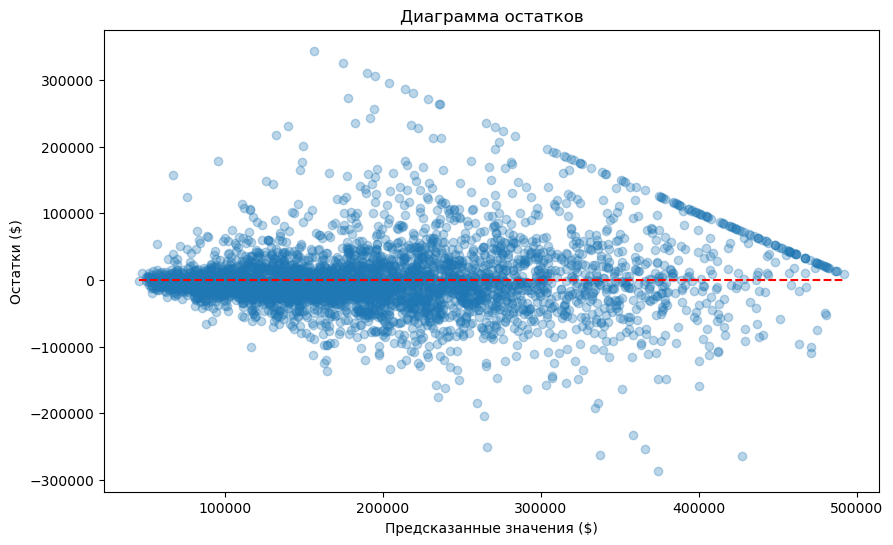

In [19]:
# Визуализация прогнозов vs факт
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Идеальная линия
plt.xlabel('Фактические значения ($)')
plt.ylabel('Предсказанные значения ($)')
plt.title('Предсказанные vs Фактические значения (Случайный Лес)')
plt.show()

# Анализ остатков (ошибок)
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', linestyles='--')
plt.xlabel('Предсказанные значения ($)')
plt.ylabel('Остатки ($)')
plt.title('Диаграмма остатков')
plt.show()